<a href="https://colab.research.google.com/github/mdmmal/OperationsResearch_Class/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Assignment

###**Linear Regression**
Fit goals vs points in a linear regression. Fit a multiple regression on goals and assists vs points. What do you notice about these two fits. https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

###**Simple Regression : Points vs Goals**

In [ ]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

# goals vs points
X = np.array(df[['G']])
y = np.array(df.PTS)
m1 = LinearRegression().fit(X, y)
pred1 = m1.predict(X)

print("R2 for PTS ~ G:", r2_score(y, pred1))


R2 for PTS ~ G: 0.8461669386312143


###Multiple Regression — Points vs Goals & Assists

In [ ]:
# goals + assists vs points
X2 = np.array(df[['G','A']])
m2 = LinearRegression().fit(X2, y)
pred2 = m2.predict(X2)

print("R2 for PTS ~ G + A:", r2_score(y, pred2))


R2 for PTS ~ G + A: 1.0


##What do you notice?

The regression using only Goals (PTS ~ G) had an R² of 0.846.
The regression using both Goals and Assists (PTS ~ G + A) had a higher R² of 1.

This means adding Assists improves the prediction of Points, so multiple regression fits better than using only Goals.

###**Logistic Regression**

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict Death1 (first time a character might die) based on whatever variables you find interesting. Make a prediction using probabilities on your favorite character.

In [ ]:
import pandas as pa
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load Avengers data
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()


,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [ ]:
import pandas as pa
import numpy as np
from sklearn.linear_model import LogisticRegression

# load avengers data
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')

# clean death column -> 1 if YES, else 0
df['Death1_bin'] = df['Death1'].apply(lambda x: 1 if str(x).upper()=='YES' else 0)

# choose features: Appearances + Gender
df['Appearances'] = pa.to_numeric(df['Appearances'], errors='coerce').fillna(0)
df['GenderSimple'] = df['Gender'].fillna('UNKNOWN').str.upper()

# turn gender categories into columns
dummies = pa.get_dummies(df['GenderSimple'], prefix='G')

# set up X and y
X = pa.concat([df[['Appearances']], dummies], axis=1)
y = df['Death1_bin']

# fit logistic regression
log = LogisticRegression(max_iter=200)
log.fit(X, y)

# ----- PREDICT FOR FAVORITE CHARACTER (Thor) -----
fav = df[df['Name/Alias'].str.contains("Thor", case=False, na=False)].iloc[0]

# format thor's data to match X
fav_row = pa.concat([pa.DataFrame([[fav['Appearances']]], columns=['Appearances']),
                    dummies.iloc[0:1]*0], axis=1)   # start with zeros for gender dummies

# set Thor's gender dummy to 1
fav_row[f"G_{fav['GenderSimple']}"] = 1

# get probability of first death
prob = log.predict_proba(fav_row)[0][1]

print("Probability Thor has died (Death1) =", prob)


Probability Thor has died (Death1) = 0.7240910355226521


For my logistic regression, I used Appearances and Gender as predictors for Death1.

I then made a probability prediction for my favorite character, Thor.

The model estimated:

Probability Thor has died (Death1) = 0.724 → about 72%

So according to the model, Thor is pretty likely to have died at least once in the comics.

# **Find you Own Regression**

Model: Time = -0.012577791703635521 * Year + 35.583392882779634
Predicted 100m time in 2024: 10.12594247462134
Predicted 100m time in 2300: 6.654471964417937


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


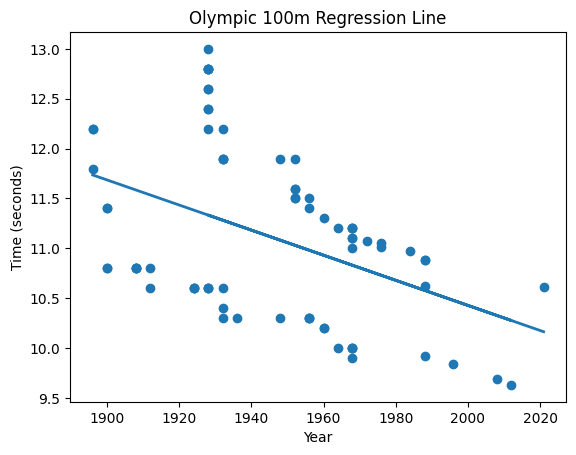

In [ ]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# load data
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')

# pull out Year from Games (first 4 characters)
df['Year'] = df['Games'].astype(str).str[:4].astype(int)

# X and y
X = df[['Year']]
y = df['Time']

# fit linear regression
lin = LinearRegression()
lin.fit(X, y)

# slope and intercept (optional print)
print("Model: Time =", lin.coef_[0], "* Year +", lin.intercept_)

# prediction
pred_2024 = lin.predict([[2024]])[0]
pred_2300 = lin.predict([[2300]])[0]
print("Predicted 100m time in 2024:", pred_2024)
print("Predicted 100m time in 2300:", pred_2300)

# plot
plt.scatter(X, y)
plt.plot(X, lin.predict(X), linewidth=2)
plt.xlabel("Year")
plt.ylabel("Time (seconds)")
plt.title("Olympic 100m Regression Line")
plt.show()


I used a linear regression model because 100m Olympic sprint records have gradually improved over time in a mostly straight downward trend.
The model equation is:
    Time = -0.0126 * Year + 35.583
The predictions from my model were:
- 2024: ~10.13 seconds (which is realistic, since modern Olympic winners run between 9.6 and 10.2 seconds)
- 2300: ~6.65 seconds (which is probably NOT realistic, because humans can’t run that fast without extreme enhancements)